In [2]:
import numpy
import math
from matplotlib import pyplot
# embed the figures into the notebook
%matplotlib inline


In [3]:
N = 50                                
x_start, x_end = -2.0, 2.0           
y_start, y_end = -1.0, 1.0           
x = numpy.linspace(x_start, x_end, N)   
y = numpy.linspace(y_start, y_end, N)    
X, Y = numpy.meshgrid(x, y)  

In [4]:
class Source:
    
    def __init__ (self,strength,x,y):
        self.strength=strength
        self.x,self.y=x,y
    
    def velocity (self,X,Y):
    
        self.u = (self.strength / (2 * math.pi) *
                  (X - self.x) / ((X - self.x)**2 + (Y - self.y)**2))
        self.v = (self.strength / (2 * math.pi) *
                  (Y - self.y) / ((X - self.x)**2 + (Y - self.y)**2))
        
    def psi (self,X,Y):
        self.psi = (self.strength / (2 * math.pi) *
                    numpy.arctan2((Y - self.y), (X - self.x)))

In [5]:
strength_source = 1.0                         
xsource, ysource = 0.0, 0.5   
source = Source(strength_source, xsource, ysource)
source.velocity(X, Y)
source.psi(X, Y)

source_image=Source (strength_source, xsource, -ysource)
source_image.velocity(X,Y)
source_image.psi(X,Y)

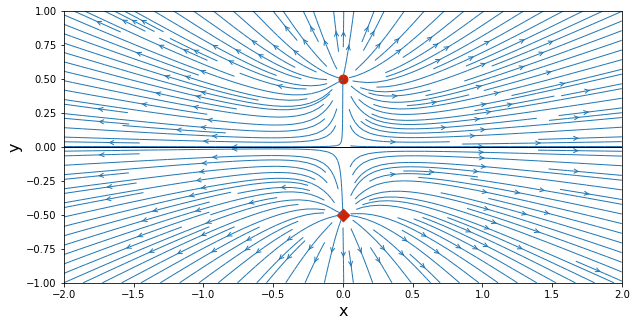

In [28]:
u = source.u + source_image.u
v = source.v + source_image.v
psi = source.psi + source_image.psi

# plot the streamlines
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(source.x, source.y, color='#CD2305', s=80, marker='o')
pyplot.scatter(source_image.x, source_image.y, color='#CD2305', s=80, marker='D')
pyplot.axhline(0., color='k', linestyle='-', linewidth=1);


In [29]:
class Vortex:
    
    def __init__(self, strength, x, y):
       
        self.strength = strength
        self.x, self.y = x, y
        
    def velocity(self, X, Y):
        
        self.u = (+self.strength / (2 * math.pi) *
                  (Y - self.y) / ((X - self.x)**2 + (Y - self.y)**2))
        self.v = (-self.strength / (2 * math.pi) *
                  (X - self.x) / ((X - self.x)**2 + (Y - self.y)**2))
        
    def stream_function(self, X, Y):
       
        self.psi = (-self.strength / (4 * math.pi) *
                    numpy.log((X - self.x)**2 + (Y - self.y)**2))

In [30]:
strength_vortex = 1.0                  
x_vortex, y_vortex = 0.0, 0.5          
vortex = Vortex(strength_vortex, x_vortex, y_vortex)
vortex.velocity(X, Y)
vortex.stream_function(X, Y)

vortex_image = Vortex(-strength_vortex, x_vortex, -y_vortex)
vortex_image.velocity(X, Y)
vortex_image.stream_function(X, Y)

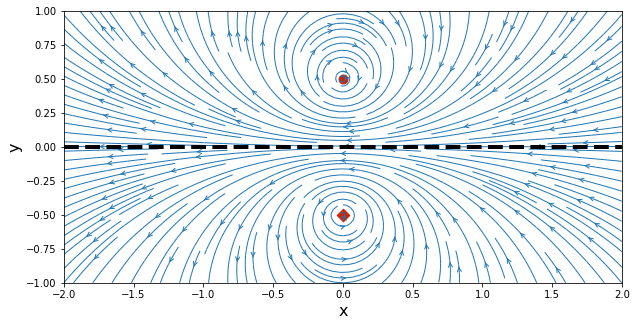

In [31]:
u = vortex.u + vortex_image.u
v = vortex.v + vortex_image.v
psi = vortex.psi + vortex_image.psi
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(vortex.x, vortex.y, color='#CD2305', s=80, marker='o')
pyplot.scatter(vortex_image.x, vortex_image.y, color='#CD2305', s=80, marker='D')
pyplot.axhline(0., color='k', linestyle='--', linewidth=4);

In [32]:
u_inf = 1.0    

u_freestream = u_inf * numpy.ones((N, N), dtype=float)
v_freestream = numpy.zeros((N, N), dtype=float)
psi_freestream = u_inf * Y

In [35]:
class Doublet:
    
    def __init__(self, strength, x, y):
        
        self.strength = strength
        self.x, self.y = x, y
        
    def velocity(self, X, Y):
        
        self.u = (-self.strength / (2 * math.pi) *
                  ((X - self.x)**2 - (Y - self.y)**2) /
                  ((X - self.x)**2 + (Y - self.y)**2)**2)
        self.v = (-self.strength / (2 * math.pi) *
                  2 * (X - self.x) * (Y - self.y) /
                  ((X - self.x)**2 + (Y - self.y)**2)**2)
            
    def stream_function(self, X, Y):
        
        self.psi = (-self.strength / (2 * math.pi) *
                    (Y - self.y) / ((X - self.x)**2 + (Y - self.y)**2))

In [34]:
strength_doublet = 1.0                
x_doublet, y_doublet = 0.0, 0.3       


doublet = Doublet(strength_doublet, x_doublet, y_doublet)


doublet.velocity(X, Y)
doublet.stream_function(X, Y)

doublet_image = Doublet(strength_doublet, x_doublet, -y_doublet)


doublet_image.velocity(X, Y)
doublet_image.stream_function(X, Y)

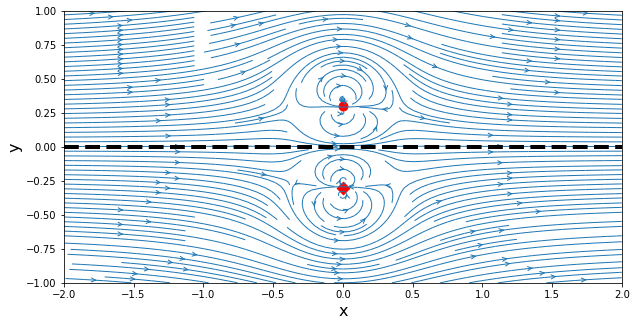

In [36]:
u = u_freestream + doublet.u + doublet_image.u
v = v_freestream + doublet.v + doublet_image.v
psi = psi_freestream + doublet.psi + doublet_image.psi

# plot the streamlines
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(doublet.x, doublet.y, color='r', s=80, marker='o')
pyplot.scatter(doublet_image.x, doublet_image.y, color='r', s=80, marker='D')
pyplot.axhline(0., color='k', linestyle='--', linewidth=4);